In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sys
import os
import time
import torch
import argparse
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data.dataloader import DataLoader
import seaborn as sns

In [ ]:
data_set = datasets.FashionMNIST('data/', train=True, download=True).data.numpy().astype(float)
data_test = data_set[1000:1300]

In [3]:
weight_0 = np.random.rand(28*28*(15*15)).reshape(28*28, 15*15)

In [4]:
data_set = data_set[:1000]

In [5]:
data_set = data_set.reshape(1000,28*28)
data_test = data_test.reshape(300,28*28)

In [6]:
a_1 = 225
a_2 = data_set.shape[1]
a_3 = data_set.shape[0]
learning_rate = 0.3
a_4 = 1
epochs_all = 100
weight_max = 0.0001
d_factor = 0.0001
rr_step = 200

np.set_printoptions(threshold=sys.maxsize)

In [7]:
sclaler = MinMaxScaler(feature_range = (0, 1))
data = sclaler.fit_transform(data_set)
data_test = sclaler.transform(data_test)


In [9]:
weight = np.copy(weight_0)
weight_final = np.copy(weight)
weight_all =[]
weight_all.append(weight_final)
for epoch in range(epochs_all):
    print("\r\nEpoch:", epoch)
    print("Learning rate:", np.around(learning_rate, 6))
    print("Neighborhood radius:", a_4)
    
    pattern_ordering = np.arange(a_3)
    
    progress = 0
    
    for p in pattern_ordering:
        
        progress = progress + 1
        
        vec_dist = np.zeros(a_1)
    
        for j in range(a_1):
            for i in range(a_2):
                vec_dist[j] = vec_dist[j] + (weight[i,j] - data[p,i])**2
                

        dist_min = np.argmin(vec_dist)
        
        
        start_1 = dist_min - a_4
        if (start_1 < 0):
            start_1 = 0
        
        end_1 = dist_min + a_4
        if (end_1 > a_1 - 1):
            end_1 = a_1 - 1
            
        
        for j in range(start_1, end_1 + 1):
            for i in range(a_2):
                weight[i,j] = weight[i,j] + learning_rate * (data[p,i] - weight[i,j])

    learning_rate = d_factor * learning_rate

    if (epoch % rr_step):
        if a_4 > 0 :
            a_4 = a_4 - 1
        
    weight_1 = np.amax(np.abs(weight - weight_final))
    
    if (weight_1 < weight_max):
        print("Weight change:", weight_1, "<", weight_max)
        print("Stopping condition is satisfied!")
        break
    else:
        print("Weight change:", weight_1, ">", weight_max)
    
    weight_final = np.copy(weight)
    weight_all.append(weight_final)




Epoch: 0
Learning rate: 0.0
Neighborhood radius: 1
Weight change: 1.0402161388922693e-06 < 0.0001
Stopping condition is satisfied!


In [11]:
cluster_patern = np.zeros((a_3, 2), dtype=int)

for p in range(300):

    vec_dist = np.zeros(a_1)

    for j in range(a_1):
        for i in range(a_2):
            vec_dist[j] = vec_dist[j] + (weight[i,j] - data_test[p,i])**2

    dist_min = np.argmin(vec_dist)
    
    cluster_patern[p,0] = a_3
    cluster_patern[p,1] = dist_min

In [13]:
clt_size = [0 for j in range(a_1)]
clt_member = [[] for j in range(a_1)]
for p in range(300):
    # increment cluster size by 1
    clt_size[cluster_patern[p,1].astype(int)] = clt_size[cluster_patern[p,1].astype(int)] + 1
    # append the pattern index to cluster members list
    clt_member[cluster_patern[p,1].astype(int)].append(p)


clt_patern = [clt_size, clt_member]

larg_clt = np.asarray(clt_size).argsort()[-20:][::-1]

print("20 Largest Clusters")
total_20 = 0
for j in larg_clt:
    print("Cluster", j, "\t=>\t", clt_size[j],"patterns.")
    total_20 = total_20 + clt_size[j]
print("\r\nTotal", total_20, "patterns are in top 20 clusters.")

20 Largest Clusters
Cluster 202 	=>	 98 patterns.
Cluster 182 	=>	 25 patterns.
Cluster 167 	=>	 23 patterns.
Cluster 207 	=>	 21 patterns.
Cluster 154 	=>	 20 patterns.
Cluster 97 	=>	 20 patterns.
Cluster 65 	=>	 13 patterns.
Cluster 163 	=>	 12 patterns.
Cluster 108 	=>	 10 patterns.
Cluster 179 	=>	 5 patterns.
Cluster 22 	=>	 5 patterns.
Cluster 43 	=>	 4 patterns.
Cluster 11 	=>	 4 patterns.
Cluster 59 	=>	 4 patterns.
Cluster 215 	=>	 4 patterns.
Cluster 169 	=>	 3 patterns.
Cluster 196 	=>	 3 patterns.
Cluster 93 	=>	 3 patterns.
Cluster 184 	=>	 2 patterns.
Cluster 212 	=>	 2 patterns.

Total 281 patterns are in top 20 clusters.


In [14]:
clusters = np.asarray(clt_size)

<BarContainer object of 225 artists>

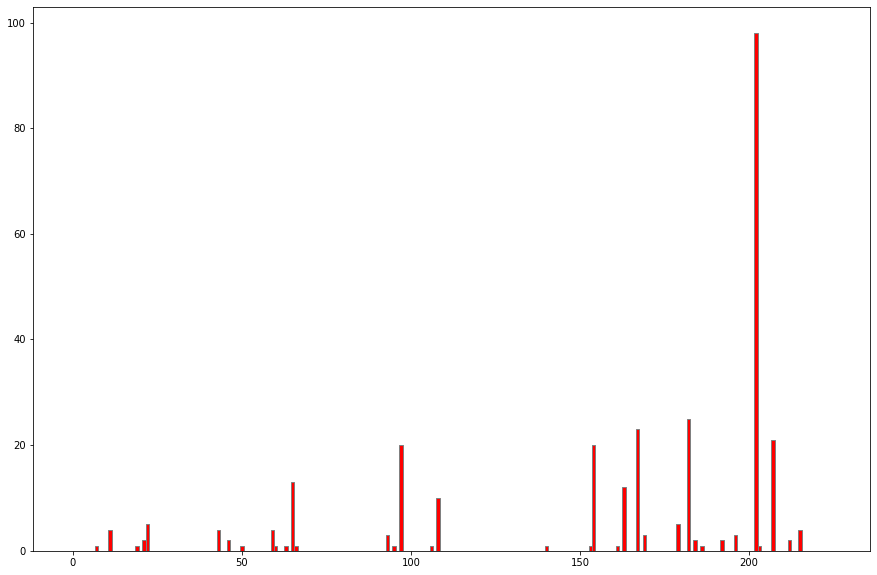

In [15]:
br1 = np.arange(len(clusters))
 
plt.figure(figsize=(15,10))
plt.bar(br1, clusters, color ='r', width = 1,
        edgecolor ='grey', label ='IT')


In [16]:
weight_final.shape

(784, 225)